In [1]:
# CAP 5630 HW5
# Josh E.

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
import random
import sys

# assumes csv's are in the same directory
ratings_small = pd.read_csv(os.getcwd() + "\\ratings_small.csv")


In [8]:
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)

# PMF model
cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8960  0.8940  0.8925  0.9042  0.8942  0.8962  0.0042  
MAE (testset)     0.6896  0.6890  0.6870  0.6942  0.6898  0.6899  0.0024  
Fit time          3.15    3.17    3.15    3.17    3.17    3.16    0.01    
Test time         0.14    0.09    0.14    0.14    0.14    0.13    0.02    


{'test_rmse': array([0.89601774, 0.89399015, 0.89247087, 0.90416792, 0.89424231]),
 'test_mae': array([0.68963543, 0.68899167, 0.68699058, 0.69422254, 0.68980454]),
 'fit_time': (3.1450510025024414,
  3.165673017501831,
  3.150874137878418,
  3.1661477088928223,
  3.1748712062835693),
 'test_time': (0.14485573768615723,
  0.09373331069946289,
  0.13865327835083008,
  0.14140772819519043,
  0.14225220680236816)}

In [3]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# User CF model
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
cross_validate(KNNBasic(k=40, sim_options = {'name': 'MSD','user_based':True} ), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9681  0.9632  0.9627  0.9779  0.9711  0.9686  0.0056  
MAE (testset)     0.7490  0.7387  0.7372  0.7509  0.7451  0.7442  0.0054  
Fit time          0.13    0.14    0.14    0.14    0.14    0.14    0.00    
Test time         1.16    1.13    1.17    1.17    1.21    1.17    0.02    


{'test_rmse': array([0.96810258, 0.96318403, 0.96269975, 0.97786182, 0.97113743]),
 'test_mae': array([0.74901052, 0.73871412, 0.73719874, 0.75086808, 0.74506256]),
 'fit_time': (0.1330881118774414,
  0.14422965049743652,
  0.14202451705932617,
  0.14303231239318848,
  0.14063429832458496),
 'test_time': (1.164395809173584,
  1.132044792175293,
  1.1686217784881592,
  1.165205717086792,
  1.2088606357574463)}

In [4]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# Item CF model
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
cross_validate(KNNBasic(k=40, sim_options = {'name': 'MSD','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9374  0.9389  0.9406  0.9291  0.9277  0.9347  0.0053  
MAE (testset)     0.7275  0.7230  0.7243  0.7138  0.7167  0.7211  0.0051  
Fit time          3.03    3.12    3.06    3.12    3.06    3.08    0.04    
Test time         5.09    5.24    5.05    5.09    5.19    5.13    0.07    


{'test_rmse': array([0.93740333, 0.93886244, 0.94064814, 0.92910017, 0.92770231]),
 'test_mae': array([0.72750314, 0.72303985, 0.72428968, 0.71381124, 0.7166702 ]),
 'fit_time': (3.02679181098938,
  3.1231393814086914,
  3.062617540359497,
  3.120844841003418,
  3.0561795234680176),
 'test_time': (5.094661235809326,
  5.238284349441528,
  5.049543380737305,
  5.092666387557983,
  5.186768293380737)}

In [5]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# User CF model with cosine similarity
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
cross_validate(KNNBasic(k=40, sim_options = {'name': 'cosine','user_based':True} ), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Item CF model with cosine similarity
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
cross_validate(KNNBasic(k=40, sim_options = {'name': 'cosine','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9977  0.9931  0.9965  0.9899  0.9933  0.9941  0.0028  
MAE (testset)     0.7702  0.7669  0.7694  0.7664  0.7641  0.7674  0.0022  
Fit time          0.41    0.41    0.42    0.41    0.43    0.41    0.01    
Test time         1.15    1.15    1.20    1.23    1.19    1.18    0.03    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

{'test_rmse': array([0.99464654, 0.9894097 , 1.0027447 , 0.98929291, 0.99600643]),
 'test_mae': array([0.77195801, 0.77160295, 0.78105063, 0.77175963, 0.77673204]),
 'fit_time': (12.19943380355835,
  12.500213623046875,
  12.376411199569702,
  12.046009540557861,
  12.360736608505249),
 'test_time': (4.781525135040283,
  4.850237131118774,
  5.035613298416138,
  5.028690338134766,
  5.0002219676971436)}

In [6]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# User CF model with pearson similarity
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
cross_validate(KNNBasic(k=40, sim_options = {'name': 'pearson','user_based':True} ), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Item CF model with pearson similarity
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
cross_validate(KNNBasic(k=40, sim_options = {'name': 'pearson','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9956  0.9978  1.0028  0.9977  0.9995  0.9987  0.0024  
MAE (testset)     0.7704  0.7714  0.7774  0.7715  0.7724  0.7726  0.0025  
Fit time          0.62    0.61    0.66    0.61    0.66    0.63    0.02    
Test time         1.14    1.18    1.19    1.19    1.11    1.16    0.03    
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson simil

{'test_rmse': array([0.9921137 , 0.98253593, 0.98458376, 0.9911428 , 0.99148269]),
 'test_mae': array([0.77234211, 0.76177457, 0.76348004, 0.76933014, 0.76784145]),
 'fit_time': (16.979318857192993,
  16.99203586578369,
  17.231871366500854,
  17.247186422348022,
  17.17194676399231),
 'test_time': (4.864551782608032,
  5.2931013107299805,
  5.109149932861328,
  5.255572557449341,
  5.269185304641724)}

In [9]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# User CF model with multiple k's
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
vars = []
for i in range(40):
    vars.append(cross_validate(KNNBasic(k=i+1, sim_options = {'name': 'MSD','user_based':True} ), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)['test_rmse'].mean())
print(vars)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2207  1.2190  1.2088  1.2090  1.2264  1.2168  0.0069  
MAE (testset)     0.9085  0.9111  0.8986  0.9015  0.9101  0.9059  0.0050  
Fit time          0.14    0.15    0.15    0.16    0.15    0.15    0.01    
Test time         0.62    0.64    0.59    0.59    0.67    0.62    0.03    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9593  0.9642  0.9741  0.9669  0.9566  0.9642  0.0061  
MAE (testset)     0.7318  0.7380  0.7443  0.7401  0.7352  0.7379  0.0043  
Fit time          0.14    0.14    0.15    0.15    0.16    0.15    0.01    
Test time         0.95    0.96    0.91    0.93    0.96    0.94    0.02    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9615  0.9563  0.9660  0.9718  0.9640  0.9639  0.0051  
MAE (testset)     0.7380  0.7318  0.7408  0.7423  0.7399  0.7386  0.0037  
Fit time          0.13    0.15    0.15    0.15    0.14    0.14    0.01    
Test time         1.11    1.16    1.06    1.05    1.12    1.10    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9646  0.9679  0.9664  0.9693  0.9633  0.9663  0.0022  
MAE (testset)     0.7387  0.7432  0.7432  0.7433  0.7409  0.7419  0.0018  
Fit time          0.14    0.15    0.15    0.15    0.15    0.15    0.00    
Test time         1.25    1.18    1.18    1.29    1.22    1.22    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std

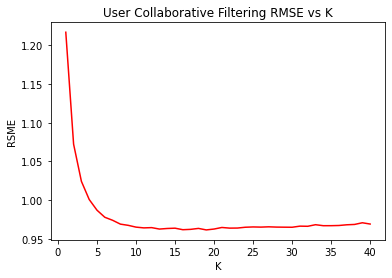

Best k: 19
Best k RMSE 0.9616061267528989


In [17]:
plt.title("User Collaborative Filtering RMSE vs K")
plt.xlabel("K")
plt.ylabel("RSME")
plt.plot(np.arange(1,41), vars, color ="red")
plt.show()
print("Best k: " + str(vars.index(min(vars)) + 1))
print("Best k RMSE " + str(min(vars)))

In [19]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# Item CF model with multiple k's
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
vars = []
for i in range(40):
    vars.append(cross_validate(KNNBasic(k=i+1, sim_options = {'name': 'MSD','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)['test_rmse'].mean())
print(vars)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3013  1.3251  1.3295  1.3062  1.3236  1.3172  0.0112  
MAE (testset)     0.9602  0.9772  0.9817  0.9658  0.9777  0.9725  0.0081  
Fit time          3.09    3.22    3.14    3.16    3.17    3.15    0.04    
Test time         3.60    3.71    3.65    3.75    3.64    3.67    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9705  0.9601  0.9767  0.9771  0.9704  0.9709  0.0061  
MAE (testset)     0.7517  0.7430  0.7560  0.7517  0.7519  0.7509  0.0042  
Fit time          3.28    3.19    3.15    3.27    3.16    3.21    0.06    
Test time         4.55    4.60    4.50    4.50    4.44    4.52    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9525  0.9354  0.9485  0.9455  0.9434  0.9451  0.0057  
MAE (testset)     0.7328  0.7259  0.7338  0.7302  0.7277  0.7301  0.0030  
Fit time          3.12    3.16    3.12    3.15    3.21    3.15    0.03    
Test time         4.91    5.07    4.94    4.99    5.06    4.99    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9414  0.9433  0.9312  0.9375  0.9333  0.9373  0.0046  
MAE (testset)     0.7294  0.7238  0.7189  0.7230  0.7201  0.7230  0.0037  
Fit time          3.10    3.12    3.13    3.12    3.14    3.12    0.01    
Test time         5.06    5.09    5.21    5.20    5.13    5.14    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  F

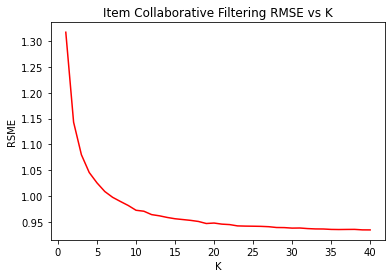

Best k: 40
Best k RMSE 0.9347653550649369


In [20]:
plt.title("Item Collaborative Filtering RMSE vs K")
plt.xlabel("K")
plt.ylabel("RSME")
plt.plot(np.arange(1,41), vars, color ="red")
plt.show()
print("Best k: " + str(vars.index(min(vars)) + 1))
print("Best k RMSE " + str(min(vars)))

In [21]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# User CF model
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
User_MSD = cross_validate(KNNBasic(k=40, sim_options = {'name': 'MSD','user_based':True} ), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(User_MSD['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9672  0.9722  0.9641  0.9672  0.9740  0.9689  0.0036  
MAE (testset)     0.7427  0.7487  0.7406  0.7448  0.7476  0.7449  0.0030  
Fit time          0.13    0.15    0.15    0.15    0.15    0.15    0.01    
Test time         1.36    1.23    1.24    1.30    1.24    1.27    0.05    
0.9689384941354842


In [23]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# Item CF model
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
Item_MSD = cross_validate(KNNBasic(k=40, sim_options = {'name': 'MSD','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(Item_MSD['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9283  0.9423  0.9368  0.9379  0.9278  0.9346  0.0057  
MAE (testset)     0.7145  0.7282  0.7209  0.7231  0.7161  0.7206  0.0050  
Fit time          3.14    3.22    3.14    3.21    3.17    3.18    0.04    
Test time         5.41    5.61    5.60    5.50    5.50    5.52    0.07    
0.9346076027122108


In [24]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# User CF model with cosine similarity
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
User_cosine = cross_validate(KNNBasic(k=40, sim_options = {'name': 'cosine','user_based':True} ), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(User_cosine['test_rmse'].mean())

# Item CF model with cosine similarity
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
Item_cosine = cross_validate(KNNBasic(k=40, sim_options = {'name': 'cosine','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(Item_cosine['test_rmse'].mean())

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9882  0.9945  0.9997  1.0008  0.9928  0.9952  0.0046  
MAE (testset)     0.7612  0.7677  0.7713  0.7734  0.7695  0.7686  0.0042  
Fit time          0.44    0.47    0.44    0.44    0.43    0.44    0.01    
Test time         1.32    1.27    1.25    1.26    1.33    1.29    0.03    
0.9951929701955153
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the c

In [25]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset

# User CF model with pearson similarity
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
User_pearson = cross_validate(KNNBasic(k=40, sim_options = {'name': 'pearson','user_based':True} ), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(User_pearson['test_rmse'].mean())

# Item CF model with pearson similarity
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
Item_pearson = cross_validate(KNNBasic(k=40, sim_options = {'name': 'pearson','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(Item_pearson['test_rmse'].mean())

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0023  0.9966  0.9999  1.0011  1.0030  1.0006  0.0023  
MAE (testset)     0.7783  0.7688  0.7748  0.7746  0.7742  0.7741  0.0031  
Fit time          0.63    0.65    0.65    0.65    0.66    0.65    0.01    
Test time         1.21    1.21    1.26    1.19    1.20    1.21    0.02    
1.000585854544582
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing

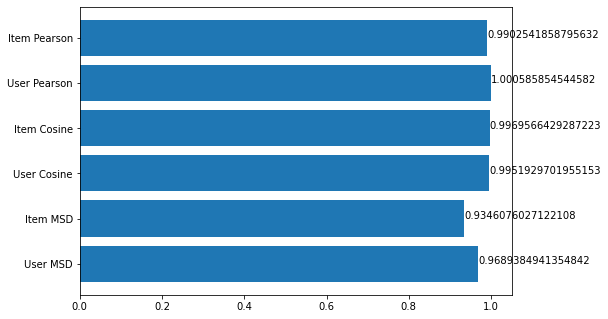

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['User MSD', 'Item MSD', 'User Cosine', 'Item Cosine', 'User Pearson', 'Item Pearson']
results = [User_MSD['test_rmse'].mean(), Item_MSD['test_rmse'].mean(), User_cosine['test_rmse'].mean(), Item_cosine['test_rmse'].mean(), User_pearson['test_rmse'].mean(), Item_pearson['test_rmse'].mean()]
ax.barh(labels, results)
for index, value in enumerate(results):
    plt.text(value, index, str(value))
plt.show()